### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

Importing the required packages below.

In [59]:
import os

os.getcwd()

'/Users/bhargavikanchiraju/Desktop/PythonCode_UTA/EDA-Project 1'

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

#### 2. Read the 3 datasets into dataframes - 2.5 marks

Reading the 3 datasets from the corresponding CSV files

In [62]:
user=pd.read_csv('user.csv')
item=pd.read_csv('item.csv')
data=pd.read_csv('data.csv')

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

Defining a function (called basic_checks)  to get the shape,info,basic decsription of the data and also to see if there are any null values in the columns.

In [63]:
def basic_checks(df):
    
    print('='*50)
    print('Shape of the dataframe is: \n',df.shape)
    print('='*50)
    print('Basic stats for the data: \n',df.describe())
    print('='*50)
    print('Data type and info :')
    print(df.info())
    print('='*50)
    print('Missing value information : \n',df.isnull().any())
    print('='*50)
    print('Sum of missing values if any : \n',df.isnull().sum())

###### User data set

Using the basic_checks function on the user dataframe to find the basic details of the data

In [64]:
basic_checks(user)

Shape of the dataframe is: 
 (943, 5)
Basic stats for the data: 
           user id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000
Data type and info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None
Missing value information : 
 user id       False
age           False
gender        False
occupation    False
zip code      False
dtype: bool
Sum of missing values if any : 
 user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64


Inferences:

1. There are 943 records and 5 columns.
2. The average age for user ratings is 34.
3. Min age for user ratings is 7.
4. There are no missing values in the dataframe.

#### Item dataset

Continuing our checks for the 'item' dataframe

In [65]:
basic_checks(item)

Shape of the dataframe is: 
 (1681, 22)
Basic stats for the data: 
           movie id      unknown       Action    Adventure    Animation  \
count  1681.000000  1681.000000  1681.000000  1681.000000  1681.000000   
mean    841.841761     0.000595     0.149316     0.080309     0.024985   
std     485.638077     0.024390     0.356506     0.271852     0.156126   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%     422.000000     0.000000     0.000000     0.000000     0.000000   
50%     842.000000     0.000000     0.000000     0.000000     0.000000   
75%    1262.000000     0.000000     0.000000     0.000000     0.000000   
max    1682.000000     1.000000     1.000000     1.000000     1.000000   

         Childrens       Comedy        Crime  Documentary        Drama  \
count  1681.000000  1681.000000  1681.000000  1681.000000  1681.000000   
mean      0.072576     0.300416     0.064842     0.029744     0.431291   
std       0.259516     0.458576     0.24632

Inferences:

1. 1681 records and 22 columns.
2. Data type inspection shows that release date shows up as an object which needs conversion. to date time object in order to extract further information.
3. No missing values found in the dataframe.

#### Data - dataset

Continuing our checks using the basic_checks function on the 'data' dataframe

In [66]:
basic_checks(data)

Shape of the dataframe is: 
 (100000, 4)
Basic stats for the data: 
             user id       movie id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.000000       5.000000  8.932866e+08
Data type and info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
movie id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB
None
Missing value information : 
 user id     

Inferences:

1. 100000 records and 4 columns in the dataframe.
2. The average user rating is 3.52 and the median user rating is 4.
3. There are no missing values in the dataframe.

#### 4. Find the number of movies per genre using the item data - 5 marks

Quick check on the item dataset by examining the head() records

In [10]:
item.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


Dropping the columns that are not necessary and getting the sum of the number of movies by genre

In [77]:
item1=item.drop(columns=['movie id', 'movie title','release date']).sum().reset_index(name='Num of Movies').sort_values(by='Num of Movies',ascending=False)
item1.rename(columns={'index':'Genre'},inplace=True)  ## Renaming the dataframe                                                                                  

print(item1)



          Genre  Num of Movies
8         Drama            725
5        Comedy            505
1        Action            251
16     Thriller            251
14      Romance            247
2     Adventure            135
4     Childrens            122
6         Crime            109
15       Sci-Fi            101
11       Horror             92
17          War             71
13      Mystery             61
12      Musical             56
7   Documentary             50
3     Animation             42
18      Western             27
10    Film-Noir             24
9       Fantasy             22
0       unknown              1


We see the highest number of movies are for the genre 'Drama' followed by 'Comedy'.

#### 5. Find the movies that have more than one genre - 2.5 marks

Getting to the required dataframe by dropping unnecessary columns and applying filter on the count of the movies 

In [78]:

item2=item.drop(columns=['movie id','release date']).set_index('movie title').sum(axis=1).reset_index(name='Count')

item2.rename(columns={'movie title':'Movie Title','':'Count'},inplace=True)

print(item2[item2.Count>1])


                                            Movie Title  Count
0                                            Toy Story       3
1                                            GoldenEye       3
3                                           Get Shorty       3
4                                              Copycat       3
6                                       Twelve Monkeys       2
7                                                 Babe       3
9                                          Richard III       2
10                                       Seven (Se7en)       2
11                                 Usual Suspects, The       2
13                                         Postino, Il       2
15                         French Twist (Gazon maudit)       2
16                                 From Dusk Till Dawn       5
19                                  Angels and Insects       2
20                              Muppet Treasure Island       5
21                                          Braveheart 

#### 6. Drop the movie where the genre is unknown - 2.5 marks

Visual inspection of the data in the item dataframe by using head() & double checking the dimensions of the dataframe.

In [79]:
item.head()

item.shape

(1681, 22)

Only selecting the movies that have genre as unknown ==0 gives us a dataframe without unknown genre set to 1.

In [84]:
item3=item[item['unknown']==0]

print(item3)


      movie id                                        movie title  \
0            1                                         Toy Story    
1            2                                         GoldenEye    
2            3                                        Four Rooms    
3            4                                        Get Shorty    
4            5                                           Copycat    
5            6     Shanghai Triad (Yao a yao yao dao waipo qiao)    
6            7                                    Twelve Monkeys    
7            8                                              Babe    
8            9                                  Dead Man Walking    
9           10                                       Richard III    
10          11                                     Seven (Se7en)    
11          12                               Usual Suspects, The    
12          13                                  Mighty Aphrodite    
13          14                    

Making sure the dataframe has reflected the changes

In [85]:
item3.shape ## Reflects that the unknown==1 record is dropped 

(1680, 22)

In [86]:
item3[item3['unknown']==1] ### Shows there are no records that have unknown=1 
#in the dataframe

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [87]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

#### Univariate plot for Age 

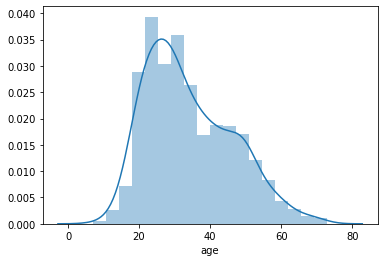

In [89]:
sns.distplot(user['age']);

###### Gender

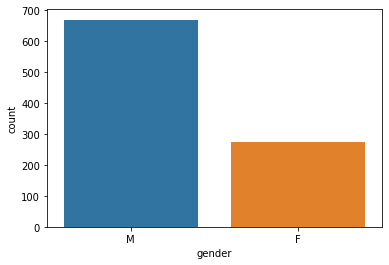

In [20]:
sns.countplot(x='gender',data=user);

# Syntax - sns.countplot(x="class", data=titanic)

###### Occupation

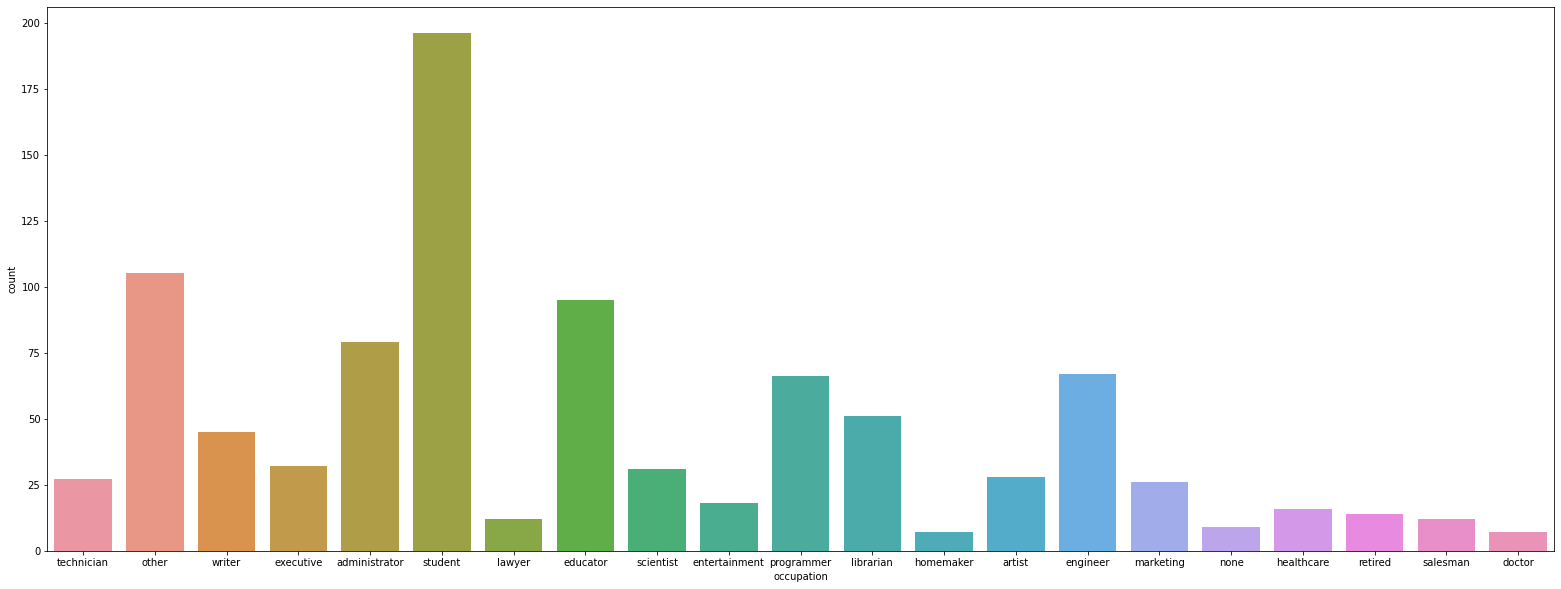

In [91]:
plt.figure(figsize=(27,10))

sns.countplot(x='occupation',data=user);

###### Ratings

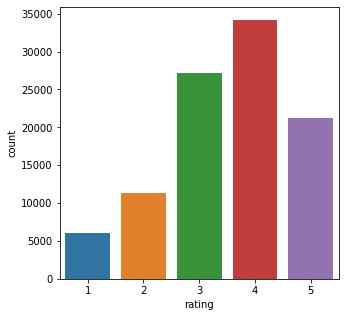

In [92]:
plt.figure(figsize=(5,5))

sns.countplot(x='rating',data=data);

###### Release year

In [93]:
item.dtypes

movie id         int64
movie title     object
release date    object
unknown          int64
Action           int64
Adventure        int64
Animation        int64
Childrens        int64
Comedy           int64
Crime            int64
Documentary      int64
Drama            int64
Fantasy          int64
Film-Noir        int64
Horror           int64
Musical          int64
Mystery          int64
Romance          int64
Sci-Fi           int64
Thriller         int64
War              int64
Western          int64
dtype: object

Approach :

1. The data type indicated that 'release date' is an object which needs to be converted to a datetime object and then the year could be extracted from it

2. Convert the object into a datetime object by using pd.to_datetime()

3. Write a lambda function to get the year from the release date

4. Extract the year from the 'release date' column

In [94]:
item['release date'] = pd.to_datetime(item['release date'])

In [95]:
item['release year']=item['release date'].apply(lambda x: x.year) 

In [96]:
item.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year
0,1,Toy Story,1995-01-01,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye,1995-01-01,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms,1995-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty,1995-01-01,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat,1995-01-01,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1995


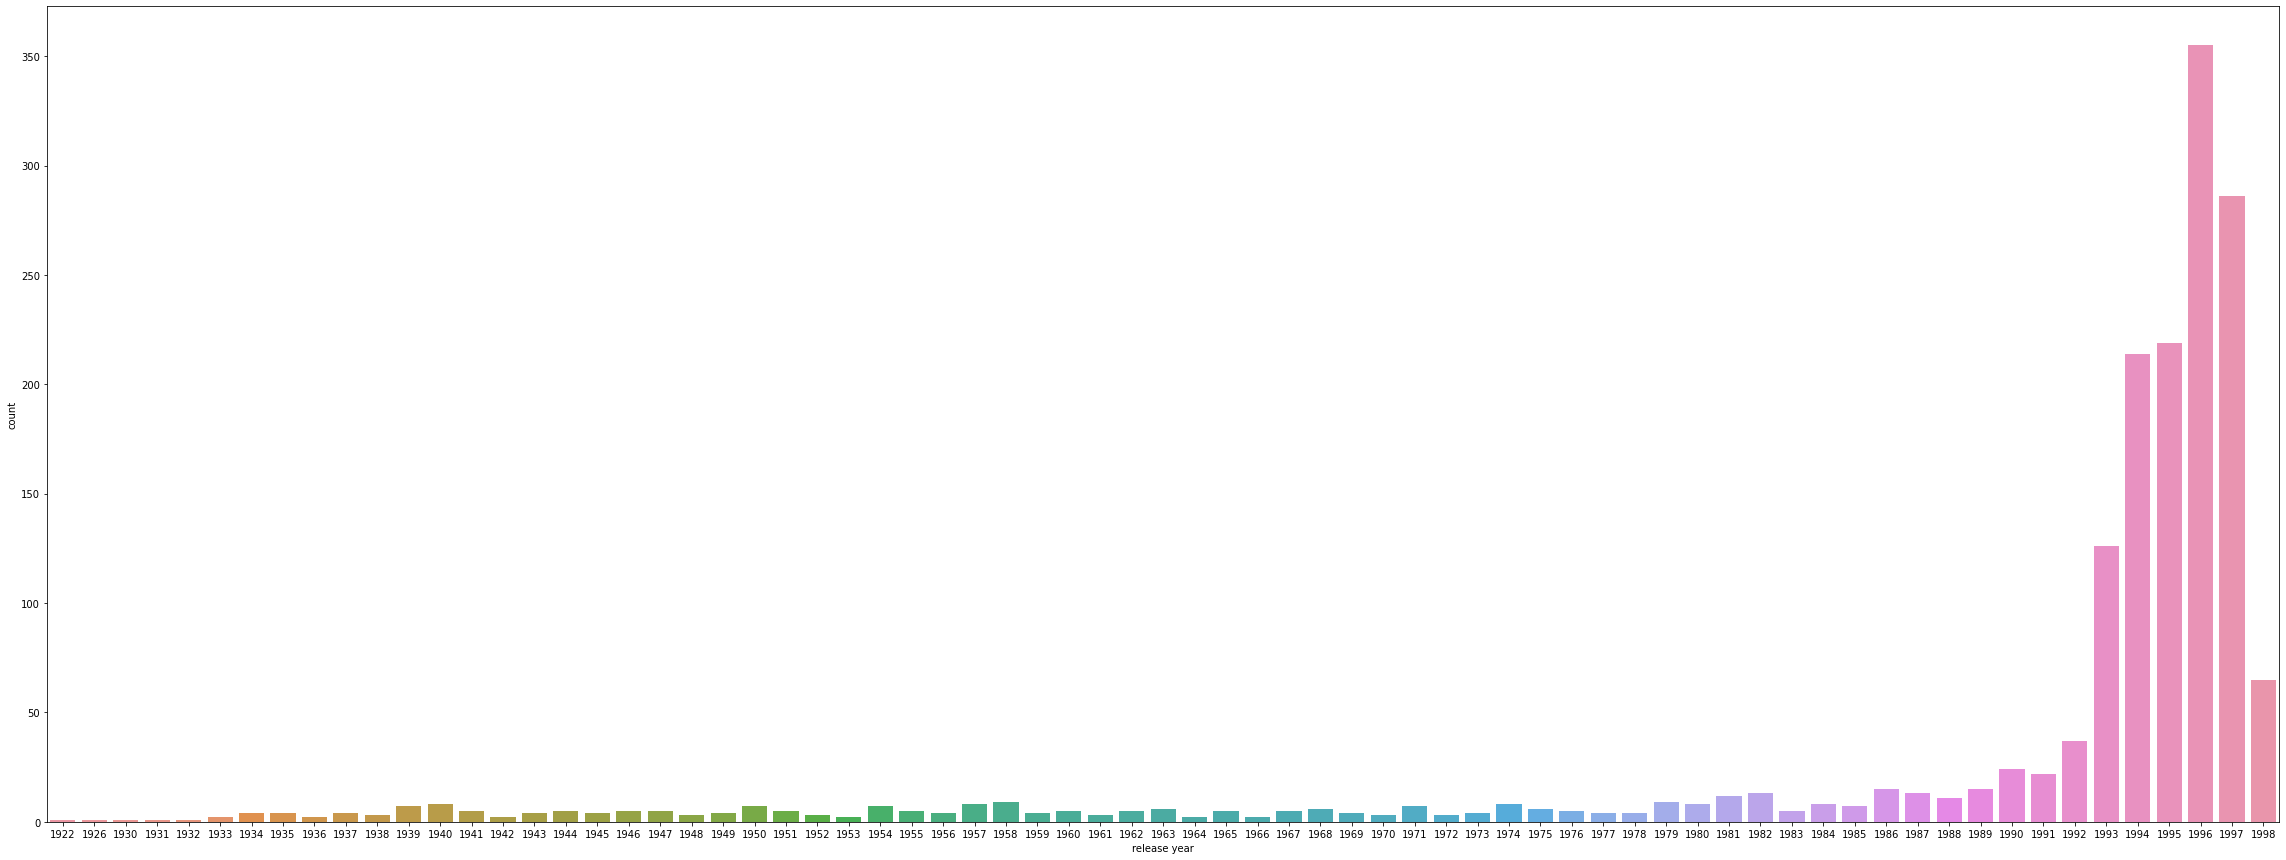

In [97]:
plt.figure(figsize=(40,15))
sns.countplot(x='release year',data=item);

The data seems to be left skewed with more number of movies concentrated in the recent years.

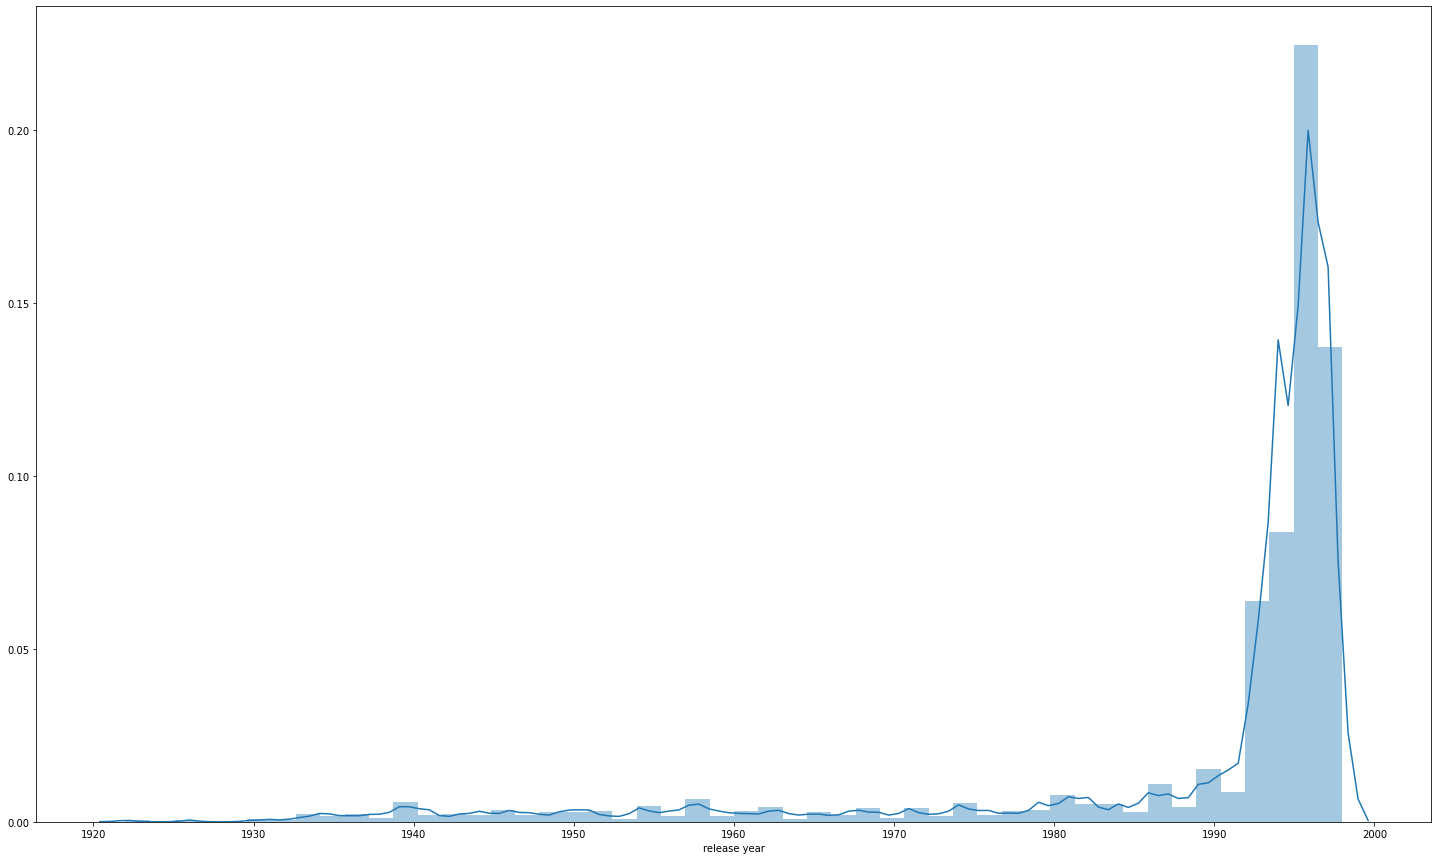

In [28]:
plt.figure(figsize=(25,15))

sns.distplot(item['release year']);

Inferences :

1. Most popular age for the movie ratings is between 20-40

2. Men seem to submit more user ratings for movies that women(possibly because there's more men's ratings than women's)

3. The students have the most ratings submitted and the least by the actor.

4. The most popular rating given by users is 4 & 3 and few have the rating 1.

5. The release date data seems to be left skewed with more number of movies concentrated in the recent years.Most movies have release years in 1990's .

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

###### Release Year by Genre 

Approach :

1. Get the list of columns (having just the genres) in the item dataset 
2. Get to a dataframe grouping each of the genres by release date and getting the sum of the number of releases by year 
3. Since there are many genres, we write a function which can use the right genre against the realse date to show the plot and the number of releases over the years.

In [98]:
cols=list(item)
cols.remove('movie title')
cols.remove('release date')
cols.remove('movie id')
cols.remove('release year')
cols.remove('release month')

ValueError: list.remove(x): x not in list

In [99]:
cols

['unknown',
 'Action',
 'Adventure',
 'Animation',
 'Childrens',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [100]:
Yearlydata=item.groupby(['release year'])[cols].sum().reset_index()
Yearlydata


,release year,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1922,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1926,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1930,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1931,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4,1932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
5,1933,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
6,1934,0,0,0,0,0,2,0,0,1,0,0,0,1,1,1,0,0,0,0
7,1935,0,0,0,0,0,2,0,0,0,0,0,1,1,0,1,0,1,0,0
8,1936,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
9,1937,0,0,0,1,1,2,0,0,1,0,0,0,3,0,2,0,0,0,0


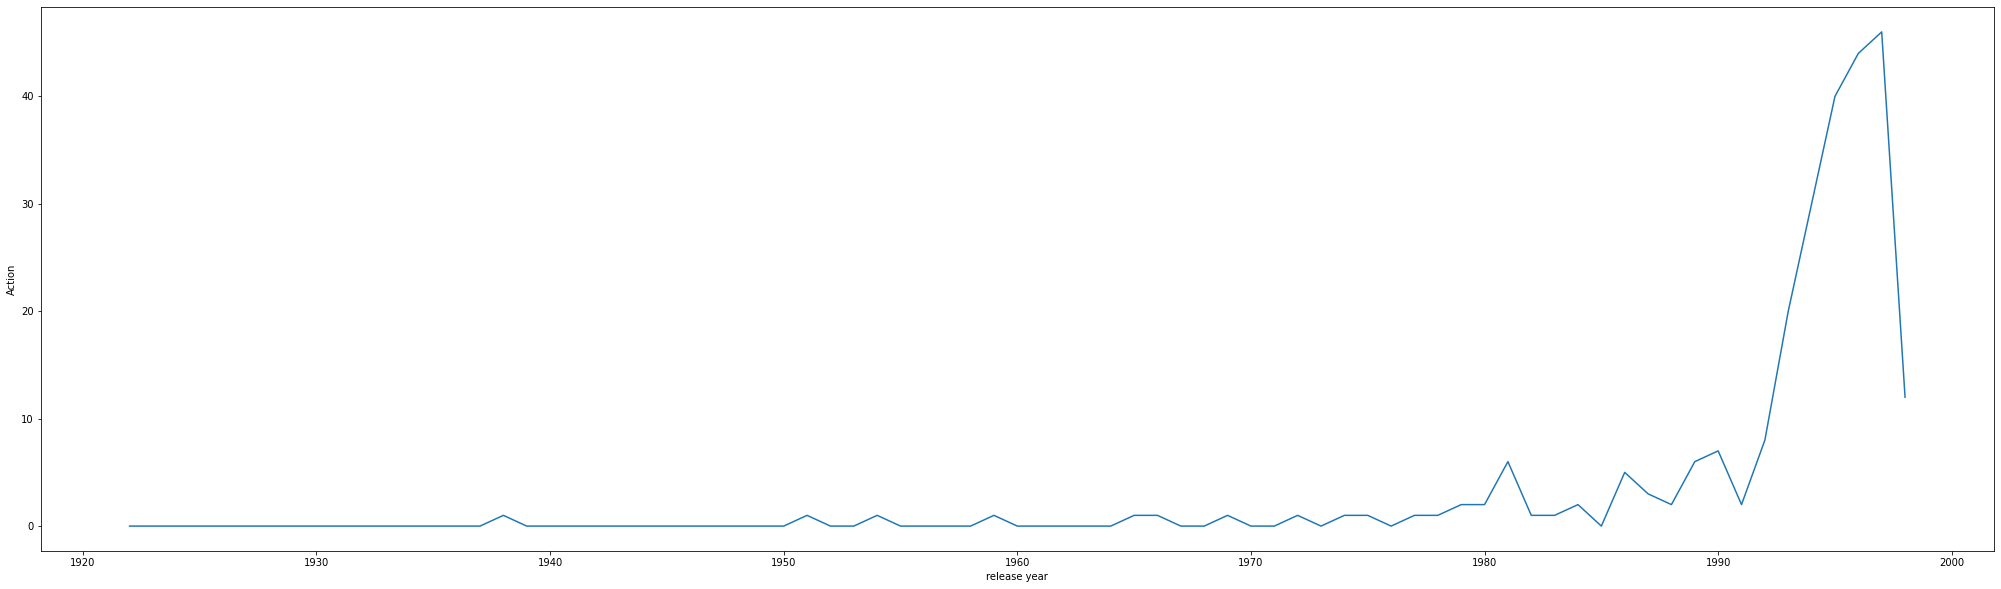

In [101]:
plt.figure(figsize=(35,10))
sns.lineplot(x='release year',y='Action',data=Yearlydata)
plt.show()

In [102]:
def yearofrelease_bygenre(cols):
    
    fig=plt.figure(figsize=(12, 14), dpi=70, facecolor='w', edgecolor='k')
    k=1
    for i in cols:
        plt.subplot(3,2,k)
        a=item.groupby(['release year'])[i].sum().reset_index()
        sns.lineplot(x='release year', y=i, data=a)
        k=k+1
        
    plt.show()

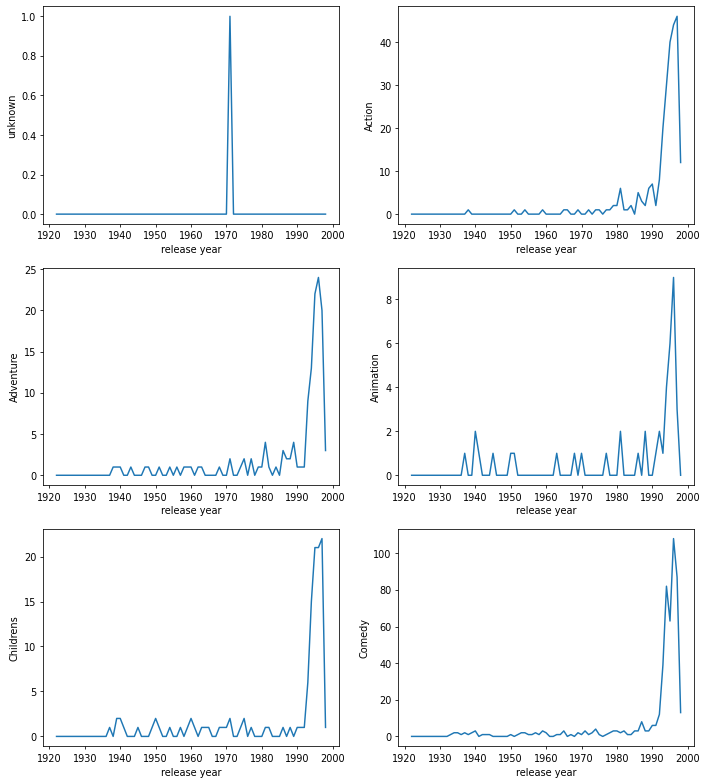

In [103]:
yearofrelease_bygenre(cols[0:6])

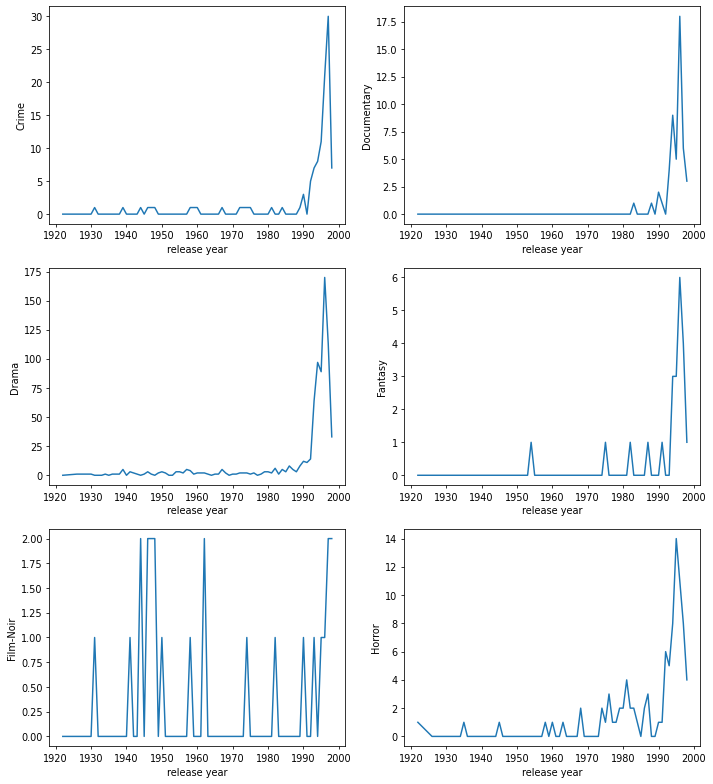

In [104]:
yearofrelease_bygenre(cols[6:12])

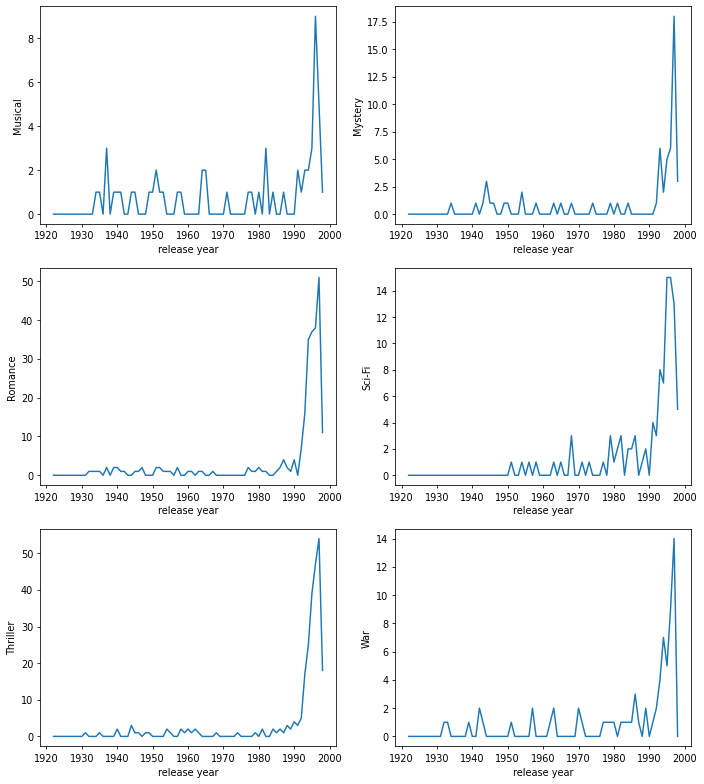

In [105]:
yearofrelease_bygenre(cols[12:18])

Inferences :

1. Just one movie is in the unknown genre in the 1970's and nothing after 
2. Almost all genres show an increase in the number of films after the year 1990 
3. Film Noir genre shows no specific trend over the release years 
4. Although the numbers are high after 1990's horror picked up in the mid 1970's 
5. Thriller shows a steady increase until late 1980's post which there's a sharp increase in the number of films.

#### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

Approach :

1. Merge the required dataframes to reach to a dataframe that has ratings,movie title 
2. Group the dataframe by the ratings count 
3. Select the list of the movies that have the rating count >100
4. Get to a dataframe which can be grouped by the mean of the ratings for different movie titles
5. Check the movie titles in the dataframe are in the list in step 3
6. Display the list of movie titles

In [106]:
### Merging data and item to get the resultant dataset which has both ratings and movie titles

ratings=pd.merge(data,item,how='inner',on='movie id')

Checking the ratings dataframe using head()

In [107]:
ratings.head()

,user id,movie id,rating,timestamp,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year
0,196,242,3,881250949,Kolya,1997-01-24,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1997
1,63,242,3,875747190,Kolya,1997-01-24,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1997
2,226,242,5,883888671,Kolya,1997-01-24,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1997
3,154,242,3,879138235,Kolya,1997-01-24,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1997
4,306,242,5,876503793,Kolya,1997-01-24,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1997


Double checking for any null values 

In [108]:

ratings.nunique()
ratings.isnull().any() 

user id         False
movie id        False
rating          False
timestamp       False
movie title     False
release date    False
unknown         False
Action          False
Adventure       False
Animation       False
Childrens       False
Comedy          False
Crime           False
Documentary     False
Drama           False
Fantasy         False
Film-Noir       False
Horror          False
Musical         False
Mystery         False
Romance         False
Sci-Fi          False
Thriller        False
War             False
Western         False
release year    False
dtype: bool

No null values found in any of the columns

Grouping the movie titles and ratings by number of ratings and getting the result into a dataframe ratings1.

In [41]:

ratings1=ratings.groupby(['movie id','movie title'])['rating'].count().reset_index()

In [42]:
ratings1.head() # getting an idea of how the resultant dataframe looks

,movie id,movie title,rating
0,1,Toy Story,452
1,2,GoldenEye,131
2,3,Four Rooms,90
3,4,Get Shorty,209
4,5,Copycat,86


Making a list of the movies that have ratings >100

In [43]:
ratings2=list(ratings1[ratings1['rating']>100]['movie title'])

In [44]:
ratings2

['Toy Story ',
 'GoldenEye ',
 'Get Shorty ',
 'Twelve Monkeys ',
 'Babe ',
 'Dead Man Walking ',
 'Seven (Se7en) ',
 'Usual Suspects, The ',
 'Mighty Aphrodite ',
 'Postino, Il ',
 "Mr. Holland's Opus ",
 'Braveheart ',
 'Taxi Driver ',
 'Rumble in the Bronx ',
 'Birdcage, The ',
 'Apollo 13 ',
 'Batman Forever ',
 'Crimson Tide ',
 'Net, The ',
 'Clerks ',
 'Ed Wood ',
 'Hoop Dreams ',
 'Star Wars ',
 'Natural Born Killers ',
 'Outbreak ',
 'Professional, The ',
 'Pulp Fiction ',
 'Quiz Show ',
 'Stargate ',
 'Shawshank Redemption, The ',
 "What's Eating Gilbert Grape ",
 'While You Were Sleeping ',
 'Ace Ventura: Pet Detective ',
 'Crow, The ',
 'Forrest Gump ',
 'Four Weddings and a Funeral ',
 'Lion King, The ',
 'Mask, The ',
 'Maverick ',
 'Firm, The ',
 'Fugitive, The ',
 'Hudsucker Proxy, The ',
 'Jurassic Park ',
 'Much Ado About Nothing ',
 'Remains of the Day, The ',
 'Searching for Bobby Fischer ',
 'Sleepless in Seattle ',
 'Blade Runner ',
 'Nightmare Before Christmas, T

Getting the top 100 average ratings 

In [109]:
topratings=ratings.groupby(['movie id','movie title'])['rating'].mean().reset_index().sort_values(by='rating',ascending=False).head(100)

Checking if the data obtained in top100 averga ratings is available in the movie list that we had got into the list - ratings2

In [110]:
topratings[topratings['movie title'].isin(ratings2)]

,movie id,movie title,rating
406,408,"Close Shave, A",4.491071
316,318,Schindler's List,4.466443
168,169,"Wrong Trousers, The",4.466102
481,483,Casablanca,4.456790
63,64,"Shawshank Redemption, The",4.445230
601,603,Rear Window,4.387560
11,12,"Usual Suspects, The",4.385768
49,50,Star Wars,4.358491
177,178,12 Angry Men,4.344000
133,134,Citizen Kane,4.292929


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


Approach :


1. Merge the required dataframes to reach to a dataframe that has ratings,gender,movie title 
2. Write a function for getting the genre by gender and showing it a barplot ,so that it can be reused for further analysis
3. Arrive at barplots for Drama,Romance and Sci-fi genres.

Since gender and genre are in different datasets the data needs merging on all 3 available dataframes .

I'll be using ratings data frame, which was previously merged on item and data based on movie id.Which will then be merged with the user dataframe.

In [111]:
#dataset1.columns

ratings.columns

ratings.shape


(99991, 26)

Merging ratings on user

In [133]:
genrebygender=pd.merge(ratings,user,on='user id',how='inner')

Checking for any null values 

In [134]:
genrebygender.columns

genrebygender.isnull().any()

user id         False
movie id        False
rating          False
timestamp       False
movie title     False
release date    False
unknown         False
Action          False
Adventure       False
Animation       False
Childrens       False
Comedy          False
Crime           False
Documentary     False
Drama           False
Fantasy         False
Film-Noir       False
Horror          False
Musical         False
Mystery         False
Romance         False
Sci-Fi          False
Thriller        False
War             False
Western         False
release year    False
age             False
gender          False
occupation      False
zip code        False
dtype: bool

In [135]:
genrebygender.shape

genrebygender.head()

,user id,movie id,rating,timestamp,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year,age,gender,occupation,zip code
0,196,242,3,881250949,Kolya,1997-01-24,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1997,49,M,writer,55105
1,196,257,2,881251577,Men in Black,1997-07-04,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1997,49,M,writer,55105
2,196,111,4,881251793,"Truth About Cats & Dogs, The",1996-04-26,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1996,49,M,writer,55105
3,196,25,4,881251955,"Birdcage, The",1996-03-08,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1996,49,M,writer,55105
4,196,382,4,881251843,"Adventures of Priscilla, Queen of the Desert, ...",1994-01-01,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1994,49,M,writer,55105


Writing a function for getting the genre by gender and showing it a barplot and the appropriate %'s for each gender ,so I can reuse the function for the analysis .

In [160]:

def genre_by_gender(genre):
    
    df1=genrebygender[[genre,'gender','rating']].groupby(['gender',genre])['rating'].count().reset_index()
    
    df2=df1[df1[genre]==1]
    
    print(df2)
    
    sns.barplot(x='gender',y='rating',data=df2)
    
    plt.show()
    
    a=df1[(df1[genre]==1)&(df1['gender']=='F')]['rating'].sum()/df1[((df1[genre]==1)|(df1[genre]==0)) & (df1['gender']=='F')]['rating'].sum()
    b=a*100
    print('% of Women that watch :',b)
    
    c=df1[(df1[genre]==1)&(df1['gender']=='M')]['rating'].sum()/df1[((df1[genre]==1)|(df1[genre]==0)) & (df1['gender']=='M')]['rating'].sum()
    d=c*100
    print('% of Men that watch :',d)


Q1.Men watch more drama than women
Q2.Women watch more Sci-Fi than men
Q3.Men watch more Romance than women

  gender  Drama  rating
1      F      1   11008
3      M      1   28887


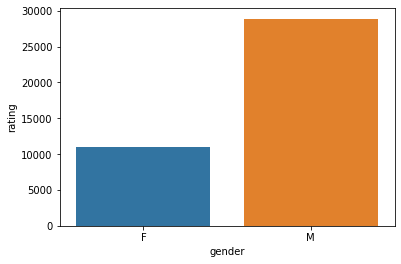

% of Women that watch : 42.76944595539669
% of Men that watch : 38.90347864732738


In [161]:
genre_by_gender('Drama')

1. Just looking at the bar plot above we get an insight that Men watch more drama than women - From the chart above this seems to be true.

2. However ,this may need further deepdive to understand if this is really true . We have seen from the previous data that there are more ratings from men in general than for women ,which would indirectly mean that if absolute numbers are compared against the genders the %'s would be domainted by men.

3. Hence the approach would be to compare the number of women who gave ratings to the number who watched drama genre amongst those .Likewise for Men.

4. Looking now at the % listed below the graph we can conclude that of those women who gave ratings 42.7% watched Drama and 38.9% of men watched drama ,showing that WOMEN watch DRAMA than MEN.Hence Men watch more drama than women is FALSE 

  gender  Sci-Fi  rating
1      F       1    2629
3      M       1   10101


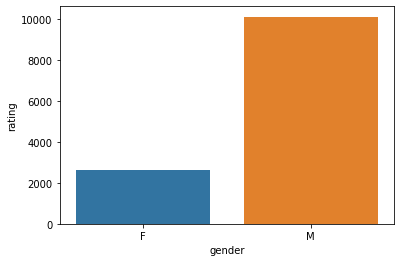

% of Women that watch : 10.214468878700753
% of Men that watch : 13.603490768049776


In [162]:
genre_by_gender('Sci-Fi')

Women watch more Sci-Fi than men - We could conclude that this is a FALSE statement.

  gender  Romance  rating
1      F        1    5858
3      M        1   13603


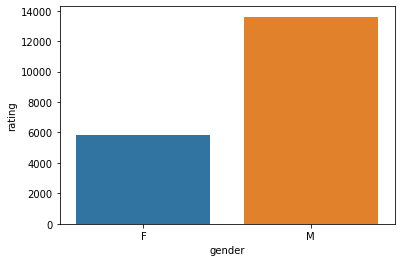

% of Women that watch : 22.760121221540135
% of Men that watch : 18.319798526658857


In [163]:
genre_by_gender('Romance')

Men watch more Romance than women - From the %'s above we conclude that this is FALSE and it seems WOmen watch ROMANCE more than MEN.

Inferences:

From the questions above ,we see that the analysis done shows the following results 

1. Men watch more drama than women - This is FALSE.
2. Women watch more Sci-Fi than men - This is FALSE and seems like men watch more Sci-Fi movies than Women.
3. Men watch more Romance than women - This is FALSE too.